In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2.EDA/attention_detection_dataset_v1.csv")
df.head()

,no_of_face,face_x,face_y,face_w,face_h,face_con,no_of_hand,pose,pose_x,pose_y,phone,phone_x,phone_y,phone_w,phone_h,phone_con,label
0,1,256.643658,144.163663,169.071331,169.066601,88.813317,0,down,-11.569698,-1.612015,0,0,0,0,0,0.00000,1
1,1,252.967014,137.871659,163.131542,163.126974,86.704057,0,down,-15.000000,10.000000,0,0,0,0,0,0.00000,1
2,1,254.416771,134.427950,155.147362,155.145836,88.408792,0,down,-12.705953,0.082978,0,0,0,0,0,0.00000,1
3,2,256.315517,246.199763,141.227055,141.227217,89.279491,2,right,32.585681,36.572800,1,117,137,276,421,0.86614,1
4,1,293.000126,285.859563,197.011509,196.998653,80.872309,2,forward,-4.013085,-9.905692,0,0,0,0,0,0.00000,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no_of_face  4000 non-null   int64  
 1   face_x      4000 non-null   float64
 2   face_y      4000 non-null   float64
 3   face_w      4000 non-null   float64
 4   face_h      4000 non-null   float64
 5   face_con    4000 non-null   float64
 6   no_of_hand  4000 non-null   int64  
 7   pose        4000 non-null   object 
 8   pose_x      4000 non-null   float64
 9   pose_y      4000 non-null   float64
 10  phone       4000 non-null   int64  
 11  phone_x     4000 non-null   int64  
 12  phone_y     4000 non-null   int64  
 13  phone_w     4000 non-null   int64  
 14  phone_h     4000 non-null   int64  
 15  phone_con   4000 non-null   float64
 16  label       4000 non-null   int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 531.4+ KB


In [ ]:
df['label'].value_counts()

,count
label,
0,2314
1,1686


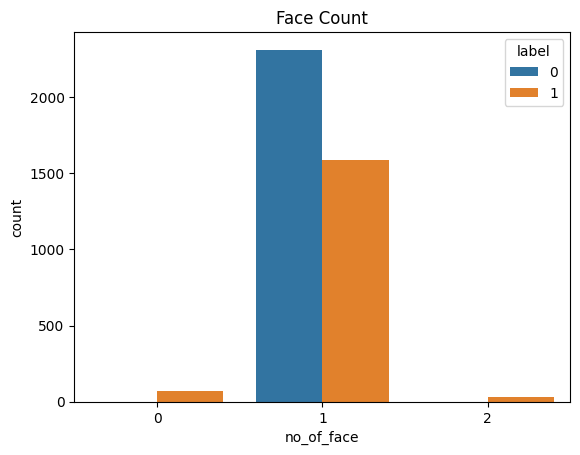

In [ ]:
sns.countplot(data=df,x="no_of_face", hue='label')
plt.title("Face Count")
plt.show()

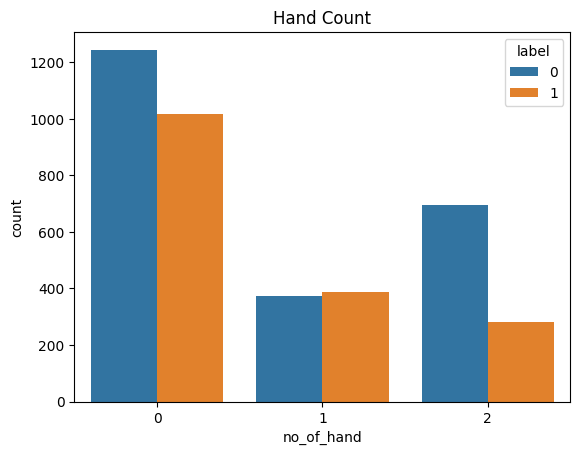

In [ ]:
sns.countplot(data=df, x= "no_of_hand",hue='label')
plt.title("Hand Count")
plt.show()

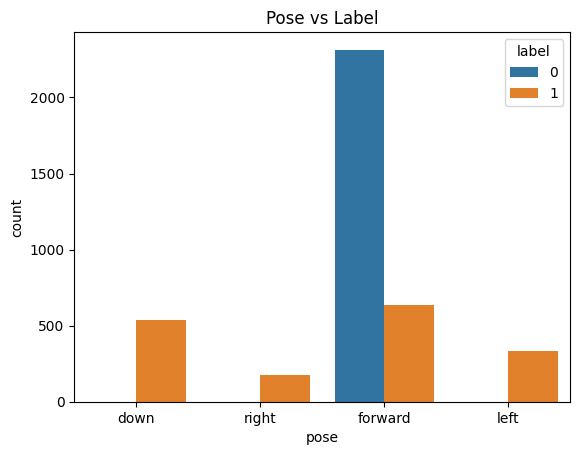

In [ ]:
sns.countplot(data=df,x="pose",hue='label')
plt.title("Pose vs Label")
plt.show()

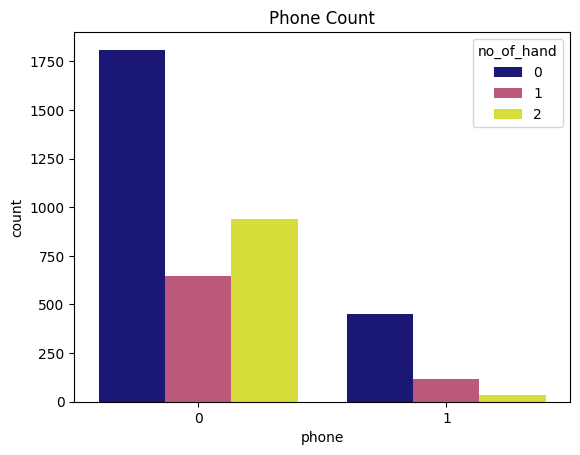

In [ ]:
sns.countplot(data=df,x="phone", hue= "no_of_hand",palette= 'plasma')
plt.title("Phone Count")
plt.show()

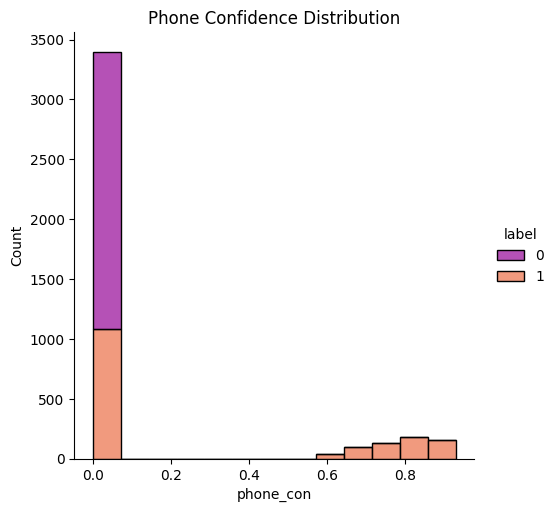

In [ ]:
sns.displot(data=df, x='phone_con', hue='label', palette="plasma", multiple="stack")
plt.title("Phone Confidence Distribution")
plt.show()

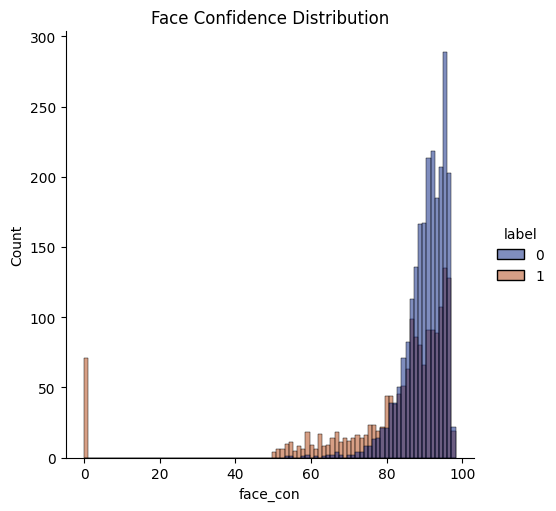

In [ ]:
sns.displot(data=df, x='face_con', hue='label', palette='dark')
plt.title("Face Confidence Distribution")
plt.show()

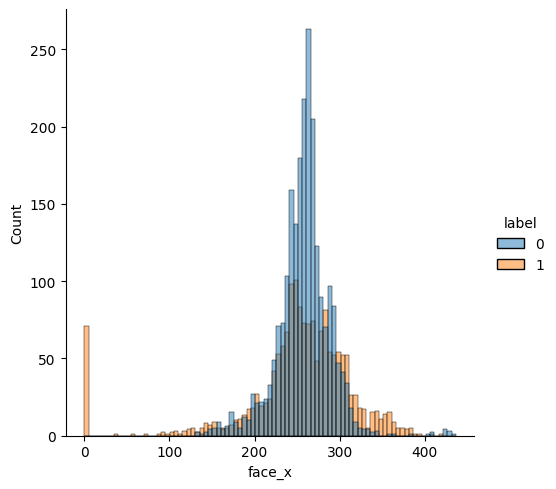

In [ ]:
sns.displot(data=df, x='face_x', hue='label')

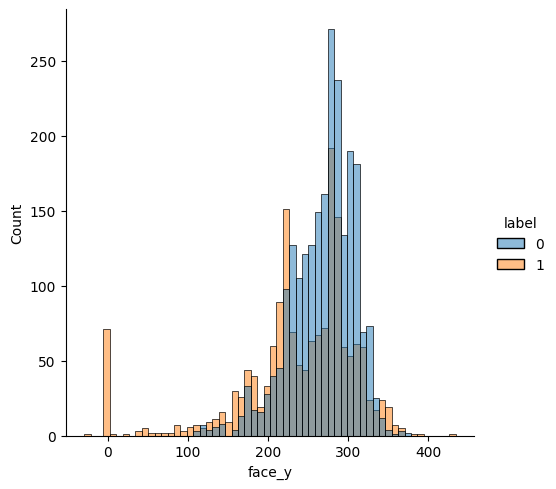

In [ ]:
sns.displot(data=df, x='face_y', hue='label')

In [ ]:
df[(df['no_of_face']==2) & (df['label']==1)].shape[0]

28

In [ ]:
pd.crosstab(df['phone'], df['no_of_hand'])

no_of_hand,0,1,2
phone,,,
0,1810,644,940
1,452,119,35


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le= LabelEncoder()
df['pose'] = le.fit_transform(df['pose'])

<Axes: >

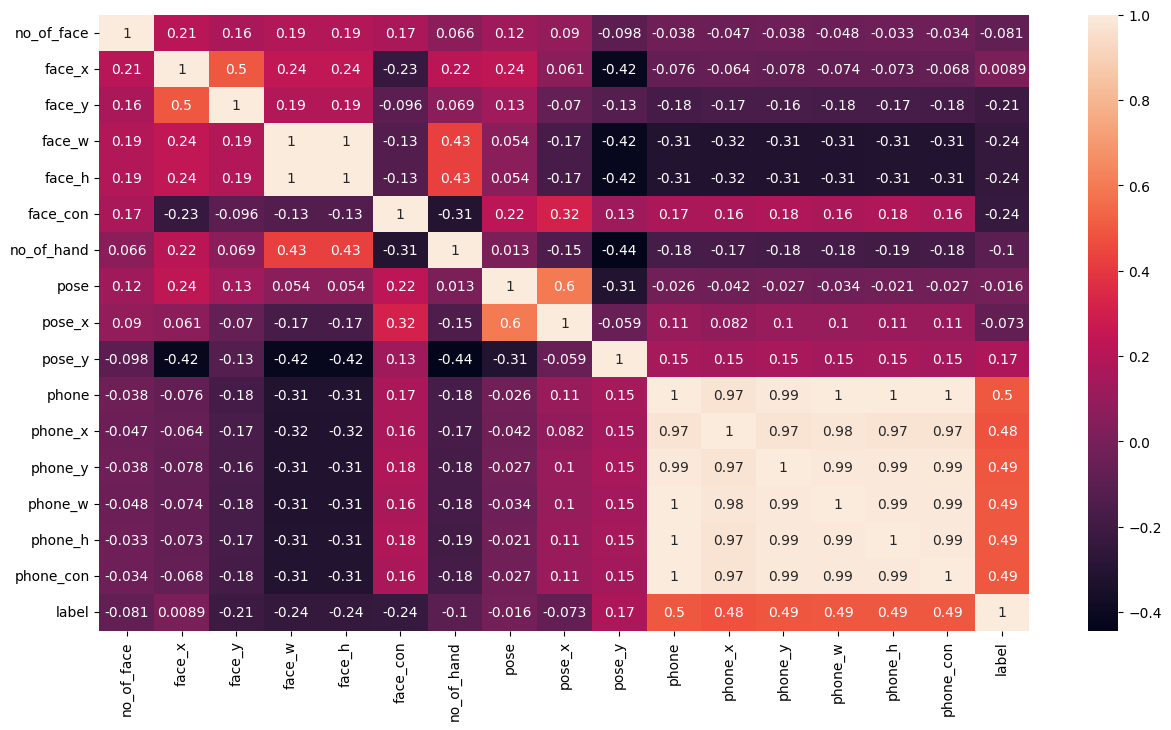

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(method='spearman'),annot=True)

<Axes: >

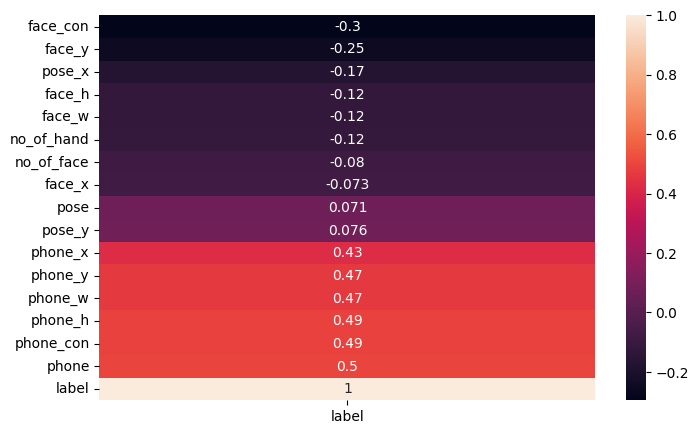

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr()[["label"]].sort_values(by='label',ascending=True),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


# models
from xgboost  import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# X = df.drop('label', axis=1)
X = df[['no_of_face','face_con', 'pose', 'no_of_hand', 'phone', 'pose_x']]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

X_train.shape, y_test.shape

((3000, 6), (1000,))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       544
           1       0.95      0.71      0.82       456

    accuracy                           0.85      1000
   macro avg       0.88      0.84      0.85      1000
weighted avg       0.87      0.85      0.85      1000



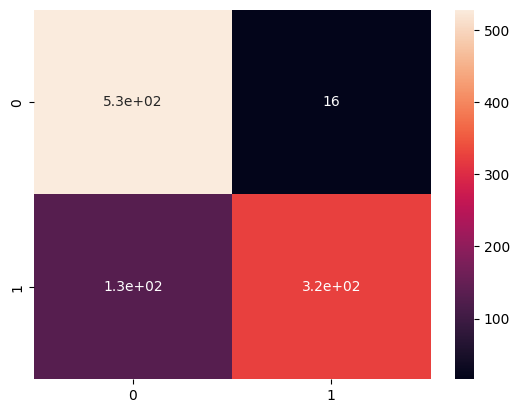

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       544
           1       0.99      0.94      0.96       456

    accuracy                           0.97      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



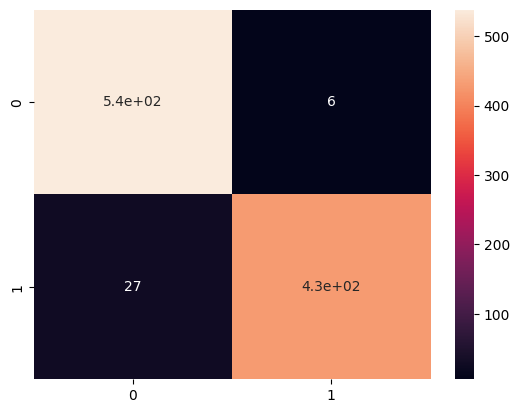

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rfc', RandomForestClassifier())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       544
           1       0.98      0.94      0.96       456

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



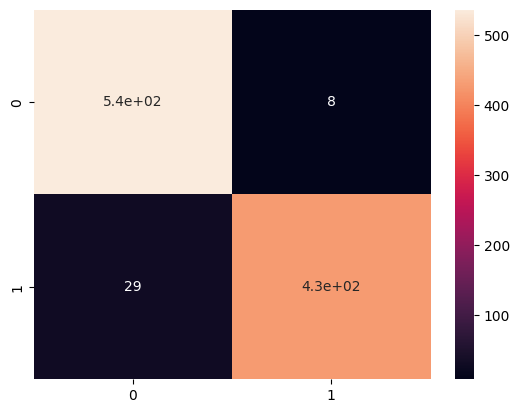

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gb', GradientBoostingClassifier())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       544
           1       0.98      0.94      0.96       456

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.97      0.96      0.96      1000



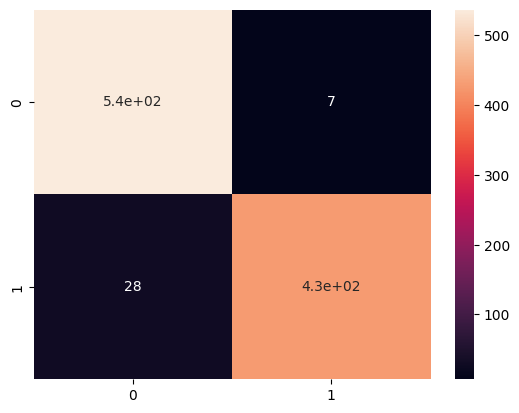

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('xgb', XGBClassifier())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       544
           1       1.00      0.89      0.94       456

    accuracy                           0.95      1000
   macro avg       0.96      0.95      0.95      1000
weighted avg       0.96      0.95      0.95      1000



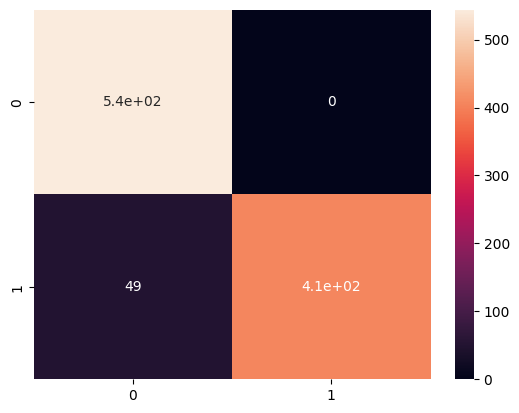

In [ ]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', SVC())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap, xgboost
xgb = XGBClassifier().fit(X_train, y_train)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

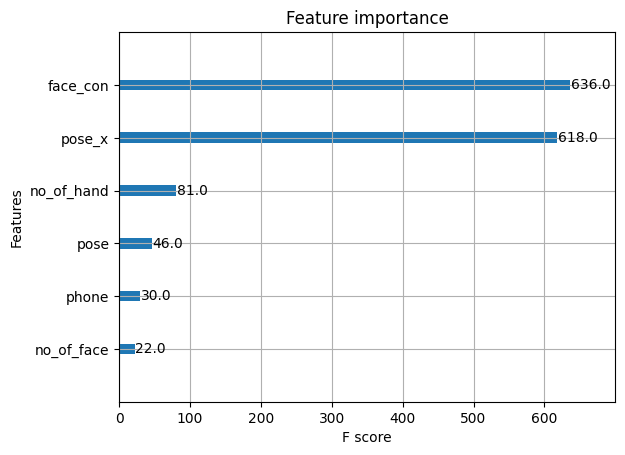

In [ ]:
xgboost.plot_importance(xgb)
plt.show()

Instance number: 777
Actual class: 1
Predicted class: 1
Class 0 Possiblity: 0.00
Class 1 Possiblity: 1.00


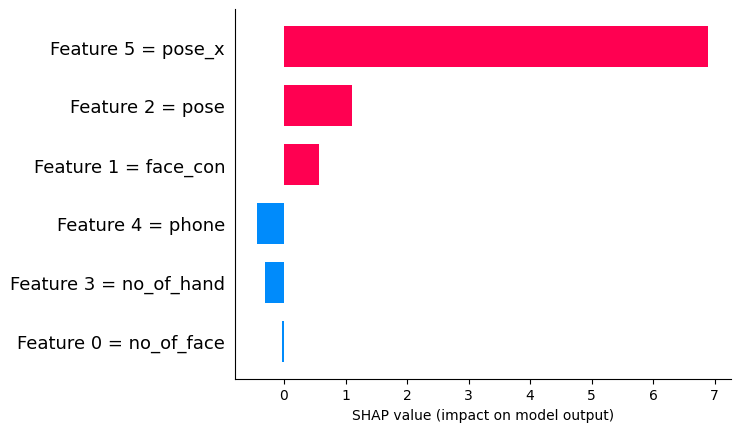

In [ ]:
shap.initjs()
instance = np.random.randint(0,1000)
print(f"Instance number: {instance}")

preds = xgb.predict(X_test)
probablity = xgb.predict_proba(X_test)

print(f"Actual class: {y_test.iloc[instance]}")
print(f"Predicted class: {preds[instance]}")
print(f"Class 0 Possiblity: {probablity[instance][0]:.2f}")
print(f"Class 1 Possiblity: {probablity[instance][1]:.2f}")


# print(X_test.iloc[instance])
# print(shap_values[instance])

shap.bar_plot(shap_values[instance], X_test, max_display=10)
shap.force_plot(explainer.expected_value, shap_values[instance], X_test.iloc[instance, :])

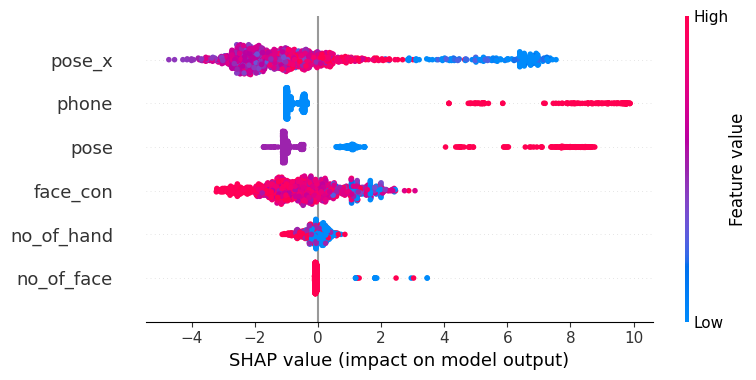

In [ ]:
shap.summary_plot(shap_values,X_test)

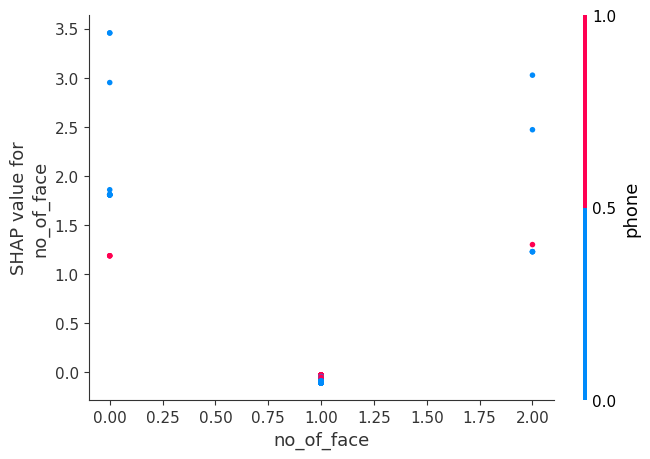

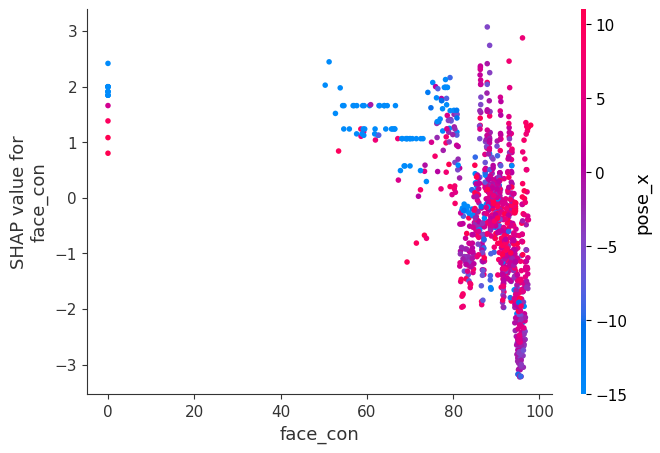

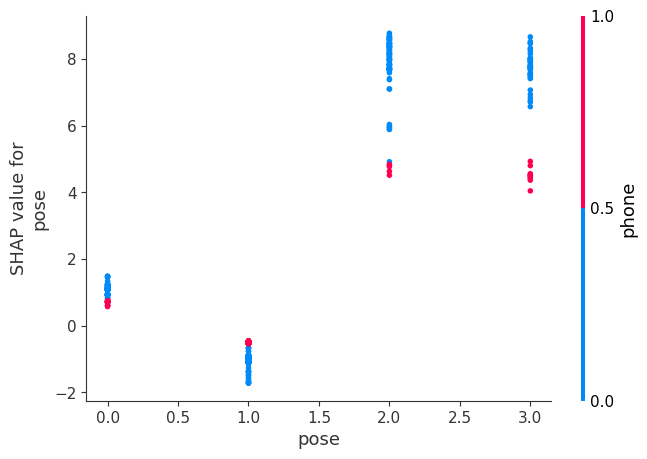

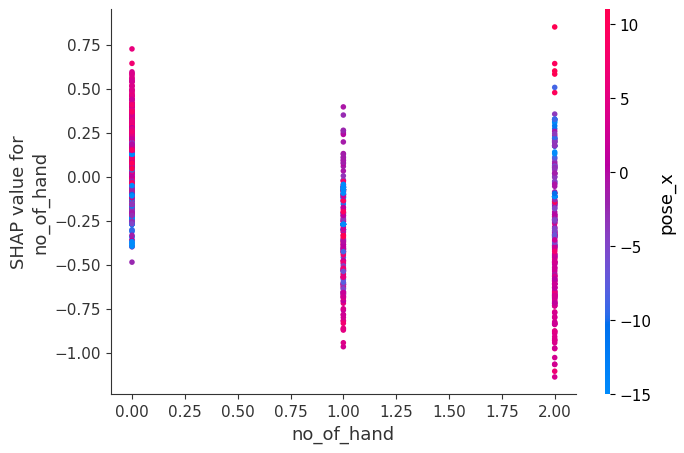

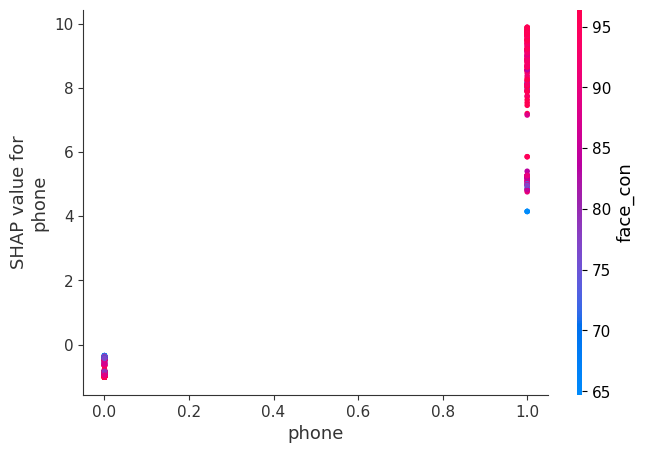

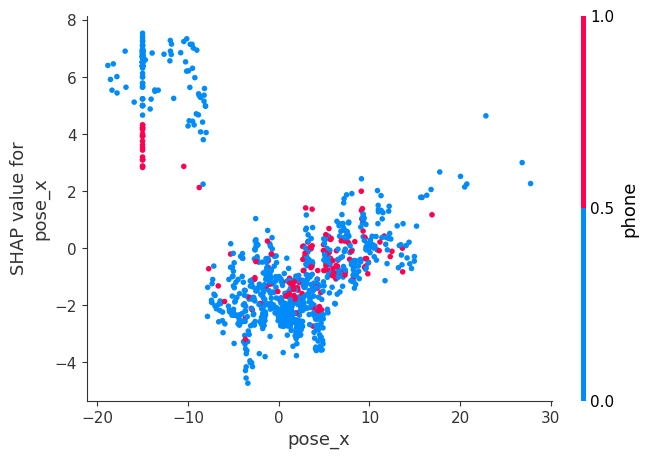

In [ ]:
for name in X_train.columns:
  shap.dependence_plot(name,shap_values,X_test,display_features=X_test)

In [ ]:
!pip install datasets
!pip install pyarrow==14.0.1 protobuf==3.20.3 datasets flwr

  Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-14.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (38.0 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flwr-datasets 0.3.0 requires pyarrow==16.1.0, but you have pyarrow 14.0.1 which is incompatible.


In [ ]:
!pip install datasets


In [ ]:
!pip install flwr

In [ ]:
!pip install flwr_datasets

  Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
Using cached pyarrow-16.1.0-cp310-cp310-manylinux_2_28_x86_64.whl (40.8 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.1
    Uninstalling pyarrow-14.0.1:
      Successfully uninstalled pyarrow-14.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from datasets import load_dataset, Dataset

# flower
import flwr as fl
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2.EDA/attention_detection_dataset_v1.csv")
df.head()

train_df = df[:3200]
test_df = df[3200:]

train_ds = Dataset.from_pandas(train_df, split='train')
test_ds = Dataset.from_pandas(test_df, split='test')


In [ ]:
train_ds.features

{'no_of_face': Value(dtype='int64', id=None),
 'face_x': Value(dtype='float64', id=None),
 'face_y': Value(dtype='float64', id=None),
 'face_w': Value(dtype='float64', id=None),
 'face_h': Value(dtype='float64', id=None),
 'face_con': Value(dtype='float64', id=None),
 'no_of_hand': Value(dtype='int64', id=None),
 'pose': Value(dtype='string', id=None),
 'pose_x': Value(dtype='float64', id=None),
 'pose_y': Value(dtype='float64', id=None),
 'phone': Value(dtype='int64', id=None),
 'phone_x': Value(dtype='int64', id=None),
 'phone_y': Value(dtype='int64', id=None),
 'phone_w': Value(dtype='int64', id=None),
 'phone_h': Value(dtype='int64', id=None),
 'phone_con': Value(dtype='float64', id=None),
 'label': Value(dtype='int64', id=None)}

In [ ]:
partitioner = IidPartitioner(num_partitions=10)

partitioner.dataset = train_ds

In [ ]:
partitioner.load_partition(partition_id=0)

Dataset({
    features: ['no_of_face', 'face_x', 'face_y', 'face_w', 'face_h', 'face_con', 'no_of_hand', 'pose', 'pose_x', 'pose_y', 'phone', 'phone_x', 'phone_y', 'phone_w', 'phone_h', 'phone_con', 'label'],
    num_rows: 320
})

In [ ]:
NUM_CLIENTS = 10
BATCH_SIZE = 32

trainloaders = []
valloaders = []
for partition_id in range(NUM_CLIENTS):
    partition = partitioner.load_partition(partition_id)

    partition = partition.train_test_split(train_size=0.8, seed=42)
    trainloaders.append(DataLoader(partition["train"], batch_size=BATCH_SIZE))
    valloaders.append(DataLoader(partition["test"], batch_size=BATCH_SIZE))

testloader = DataLoader(test_ds, batch_size=BATCH_SIZE)



In [ ]:
batch = next(iter(trainloaders[0]))

In [ ]:
features = {
    'no_of_face': batch['no_of_face'],
    'face_x': batch['face_x'],
    'face_y': batch['face_y'],
    'face_w': batch['face_w'],
    'face_h': batch['face_h'],
    'face_con': batch['face_con'],
    'no_of_hand': batch['no_of_hand'],
    'pose': batch['pose'],
    'pose_x': batch['pose_x'],
    'pose_y': batch['pose_y'],
    'phone': batch['phone'],
    'phone_x': batch['phone_x'],
    'phone_y': batch['phone_y'],
    'phone_w': batch['phone_w'],
    'phone_h': batch['phone_h'],
    'phone_con': batch['phone_con']
}

labels = batch['label']

# # Example of processing the features and labels
# print("Features:")
# for key, value in features.items():
#     print(f"{key}: {value}")

# print("Labels:")
# print(labels)


In [ ]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

In [ ]:
# define model
class attentionNet(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.hidden_1 = nn.Linear(16, 80)
        self.act_1 = nn.ReLU()

        self.hidden_2 = nn.Linear(80, 400)
        self.act_2 = nn.ReLU()

        self.hidden_3 = nn.Linear(400, 80)
        self.act_3 = nn.ReLU()

        self.hidden_4 = nn.Linear(80,16)
        self.act_4 = nn.ReLU()

        self.out = nn.Linear(16, 1)
        self.act_out = nn.Sigmoid()

    def forward(self, x):
        x = self.act_1(self.hidden_1(x))
        x = self.act_2(self.hidden_2(x))
        x = self.act_3(self.hidden_3(x))
        x = self.act_4(self.hidden_4(x))
        x = self.act_out(self.out(x))

        return x